In [52]:
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
# import sys
# !{sys.executable} -m pip install bokeh

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import plotly.express as px
import bokeh

<h3>QUESTION 1: Read in the gapminder_clean.csv as a pandas DataFrame.</h3>

In [7]:
# turns the csv into a DataFrame
df = pd.read_csv('gapminder_clean.csv')

<h3>QUESTION 2: Filter the data to include only rows where Year is 1962 and then make a scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap for the filtered data.</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

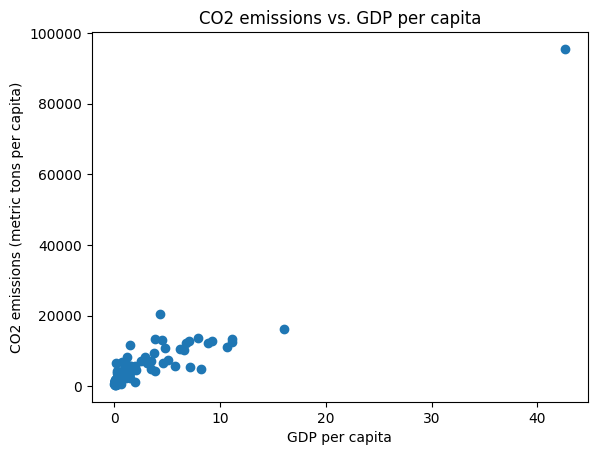

In [23]:
# df.loc[] accesses particular data 
# np.where() returns elements based on a certain condition
df1962 = df.loc[np.where((df['Year']==1962))]

co2 = df1962['CO2 emissions (metric tons per capita)']
gdp = df1962['gdpPercap']

plt.scatter(co2, gdp)
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.xlabel('GDP per capita')
plt.title('CO2 emissions vs. GDP per capita in 1962')
plt.show

<h3>QUESTION 3: On the filtered data, calculate the pearson correlation of 'CO2 emissions (metric tons per capita)' and gdpPercap. What is the Pearson R value and associated p value?</h3>

In [20]:
# Pearson r value = coefficient that measures linear correlation between two sets of data.
# Pearson p value = probability that of the current result if the correlation coefficient = zero — assesses whether a correlation is real 
stats = pg.corr(co2, gdp)
# pg.corr returns a DataFrame with r and p-val as two of the indexes
r = stats['r']
p = stats['p-val']
print(f"r value: {r} \n")
print(f"p value: {p}")

r value: pearson    0.926082
Name: r, dtype: float64 

p value: pearson    1.128679e-46
Name: p-val, dtype: float64


<h3>QUESTION 4: On the unfiltered data, answer "In what year is the correlation between 'CO2 emissions (metric tons per capita)' and gdpPercap the strongest?" Filter the dataset to that year for the next step.</h3>

In [62]:
# value_counts() returns a series with the indexes as the unique values and the values as the counts of each value
years = list(df['Year'].value_counts().index)
correlations = []

for year in years:
    data = df.loc[np.where((df['Year']==year))]
    # ls is a DataFrame with the current loop year and its r value  
    ls = pg.corr(data['CO2 emissions (metric tons per capita)'], data['gdpPercap'])
    ls['year'] = year
    # correlations is a list of each unique year and their r values
    correlations.append(ls)
# print(correlations)

# pd.concat combines all the DataFrames in ls into one DataFrame
result = pd.concat(correlations).sort_values(by=['r'], ascending=False)
print(f"highest r value: {result['r'].iloc[0]}")
print(f"year: {result['year'].iloc[0]}")

df1967 = df.loc[np.where((df['Year']==1967))]

highest r value: 0.938791838506331
year: 1967


<h3>QUESTION 5: Using plotly or bokeh, create an interactive scatter plot comparing 'CO2 emissions (metric tons per capita)' and gdpPercap, where the point size is determined by pop (population) and the color is determined by the continent.
</h3>

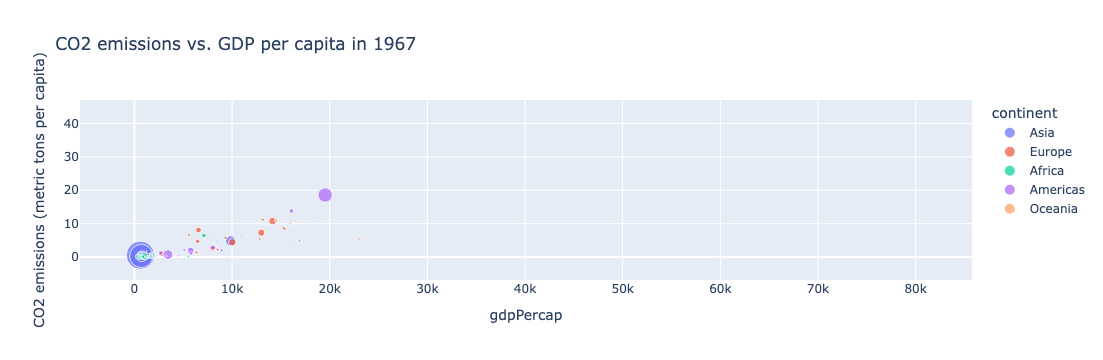

In [71]:
# cutting DataFrame down to only the needed columns; dropna() drops all null values
df1967 = df1967[['gdpPercap', 'CO2 emissions (metric tons per capita)', 'continent', 'pop']].dropna()
fig = px.scatter(df1967, x=df1967['gdpPercap'], y=df1967['CO2 emissions (metric tons per capita)'], 
                title="CO2 emissions vs. GDP per capita in 1967", color="continent", size="pop")
fig.show()